In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
data = pd.read_csv('../input/train.csv')
# visualize first 5 rows
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [74]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
train, test = train_test_split(data, test_size=0.2, random_state=2023)

train_X = train.drop('Price', axis=1) # Features (all columns except 'Price')
train_y = train['Price']

test_X = test.drop('Price', axis=1) # Features (all columns except 'Price')
test_y = test['Price']

In [4]:
print(data.isnull().sum())
print()
data.info()

# We can also see that there are several columns with null values

# We can see that we have 5847 entries, and we have 12 features to work on (removing the price and the id)
# We can see that the id is an int, and the price is a float
# We can see that out of the 12 useful features, 9 of them are object types, 2 are ints, and 1 is a float

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5847 entries, 0 to 5846
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5847 non-null   int64  
 1   Name               5847 non-null   object 
 2   Location           5847 non-null   object 
 3   Year               5847 non-null   int64  
 4   Kilometers_Driven  5847 non-null   int64  
 5   Fuel_Type          5847 non-null   object 
 6   Transmission       5847 non-null   object 
 7   Owner_Type         5847 non-null   object 
 8   Mileage            5845 non-nu

In [5]:
# Number of unique values for each column
data.nunique()

Unnamed: 0           5847
Name                 1804
Location               11
Year                   22
Kilometers_Driven    3019
Fuel_Type               3
Transmission            2
Owner_Type              4
Mileage               419
Engine                140
Power                 361
Seats                   8
New_Price             534
Price                1366
dtype: int64

In [6]:
# Seems like there is a good distribution of entries for each location
print(data['Location'].value_counts())

Location
Mumbai        762
Hyderabad     710
Kochi         640
Coimbatore    631
Pune          590
Delhi         540
Kolkata       525
Chennai       476
Jaipur        403
Bangalore     352
Ahmedabad     218
Name: count, dtype: int64


In [7]:
# Seems like some of the years have barely no records. We should probably remove the entries with those years
print(data['Year'].value_counts())


Year
2014    784
2015    734
2016    734
2013    631
2017    582
2012    558
2011    455
2010    330
2018    294
2009    193
2008    163
2007    106
2019    101
2006     69
2005     44
2004     27
2003     16
2002     12
2001      5
2000      4
1998      3
1999      2
Name: count, dtype: int64


In [12]:
# Since the Electric Fuel_Type only has two entries, we might remove the entries
print(data['Fuel_Type'].value_counts())
print()
# Transmission seems alright
print(data['Transmission'].value_counts())
print()
print(data['Owner_Type'].value_counts())
print()
print(data['Seats'].value_counts())


Fuel_Type
Diesel      3161
Petrol      2684
Electric       2
Name: count, dtype: int64

Transmission
Manual       4135
Automatic    1712
Name: count, dtype: int64

Owner_Type
First             4811
Second             925
Third              103
Fourth & Above       8
Name: count, dtype: int64

Seats
5.0     4866
7.0      668
8.0      133
4.0       93
6.0       29
2.0       13
10.0       4
9.0        3
Name: count, dtype: int64


In [11]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,5847.000000,5847.000000,5.847000e+03,5809.000000,5847.000000
mean,3013.181461,2013.448435,5.841013e+04,5.286452,9.653742
std,1736.398890,3.194949,9.237971e+04,0.806668,11.275966
min,1.000000,1998.000000,1.710000e+02,2.000000,0.440000
25%,1509.500000,2012.000000,3.346750e+04,5.000000,3.550000
50%,3015.000000,2014.000000,5.257600e+04,5.000000,5.750000
75%,4517.500000,2016.000000,7.249050e+04,5.000000,10.250000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


<Axes: >

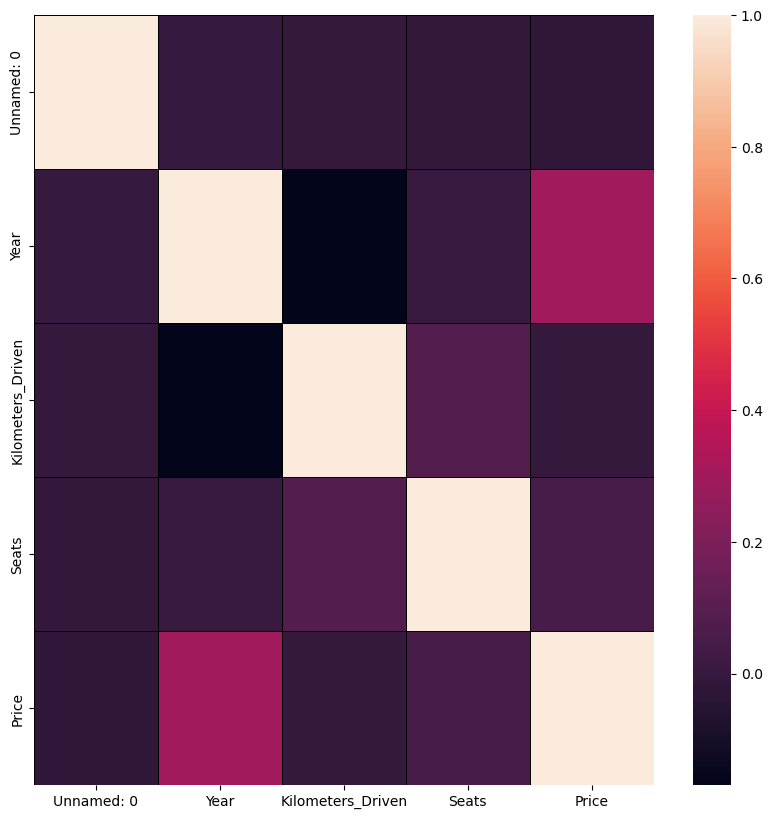

In [20]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
fig = plt.figure(figsize = (10,10))
incidents_corr = numeric_data.corr(method = 'pearson')
sns.heatmap(incidents_corr, linecolor='black', linewidths=0.5)

# we can see that there is a slight correlation between price and year, but that's about it